# Stock Market Data Analysis with Python

**Basics for handling and analyzing stock market data**

## 1. Getting Stock Data
Getting Data from **[Quandl](https://github.com/quandl/quandl-python)**. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns
sns.set_context("notebook")

In [2]:
# https://docs.quandl.com/v1.0/docs/python-installation#section-authentication
tata_steel = quandl.get("NSE/TATASTEEL", authtoken="REFER-TO-DOCUMENTATION")

In [3]:
tata_steel.shape

(3157, 7)

In [4]:
tata_steel.head(3)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2005-10-17,380.00,386.30,374.6,384.2,384.35,4618966.0,17639.41
2005-10-18,386.85,388.55,364.1,365.1,374.85,3408087.0,13024.16
2005-10-19,371.60,373.55,352.0,362.7,361.55,4549667.0,16641.13


In [5]:
tata_steel.tail(3)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-07-04,567.4,573.40,559.55,571.00,571.1,6862947.0,38969.43
2018-07-05,565.0,565.00,552.00,553.50,553.3,6013653.0,33521.22
2018-07-06,550.0,564.25,546.35,553.35,553.5,6614783.0,36841.56


In [6]:
tata_steel.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3157.0,4.757305e+02,1.572551e+02,137.50,368.75,464.15,582.70,997.30
High,3157.0,4.838658e+02,1.600759e+02,150.40,373.85,471.50,591.40,1048.00
Low,3157.0,4.664906e+02,1.538628e+02,137.50,362.10,454.30,572.25,966.25
Last,3157.0,4.747074e+02,1.568364e+02,148.90,366.70,462.05,580.10,993.00
Close,3157.0,4.748271e+02,1.568433e+02,148.80,367.40,462.30,580.60,988.90
Total Trade Quantity,3157.0,5.454981e+06,3.390759e+06,66051.00,3195158.00,4679209.00,6812728.00,49407351.00
Turnover (Lacs),3157.0,2.442768e+04,1.579072e+04,207.05,13966.35,19933.62,30007.14,240287.82


## 2. Visualizing Stock Data

### Plot the Daily Closing Price and Volume of a Stock

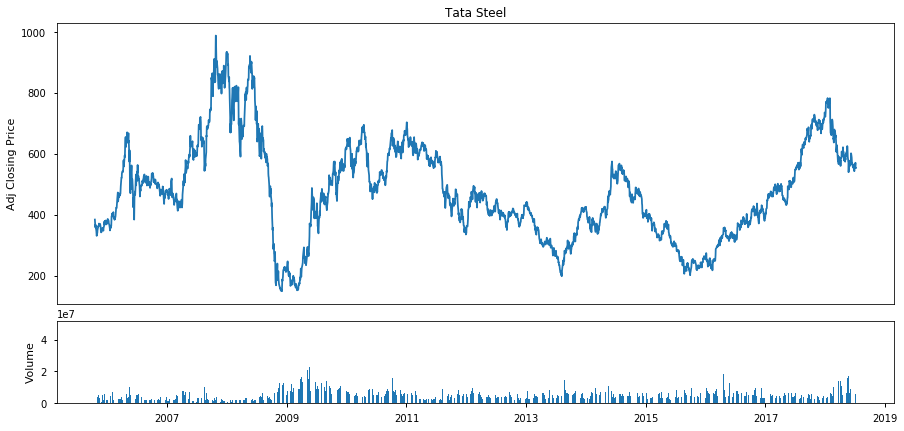

In [7]:
plt.figure(figsize=(15,7))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(tata_steel.index, tata_steel['Close']) 
bottom.bar(tata_steel.index, tata_steel['Total Trade Quantity']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('Tata Steel')
top.set_ylabel('Adj Closing Price')
bottom.set_ylabel('Volume');

### Plot a Histogram of the Daily Closing Price

/Users/adhiman/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


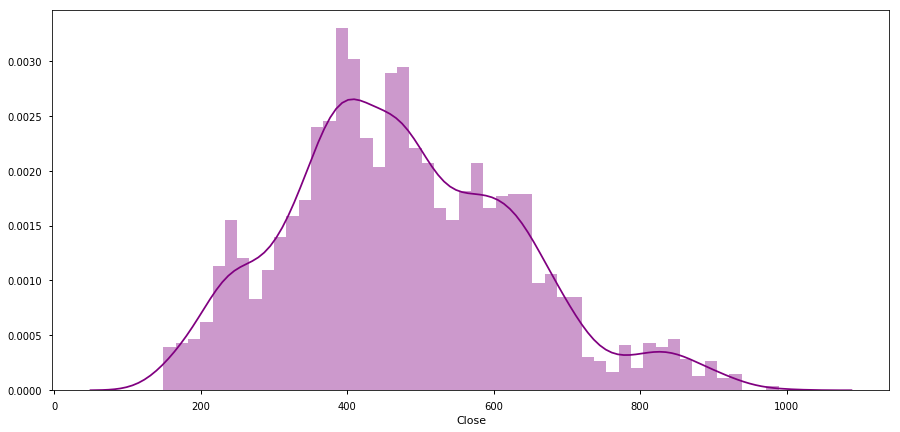

In [8]:
plt.figure(figsize=(15,7))
sns.distplot(tata_steel['Close'].dropna(), bins=50, color='purple');

### Chart using Simple Moving Average

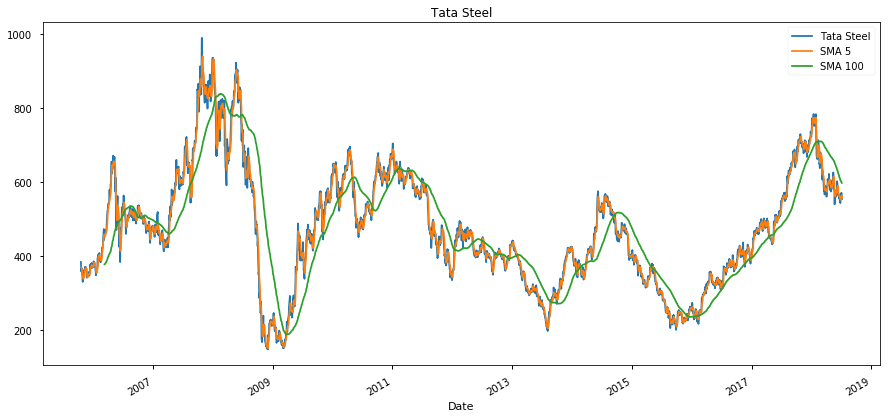

In [9]:
# simple moving averages
sma5 = tata_steel['Close'].rolling(5).mean() #5 days
sma100 = tata_steel['Close'].rolling(100).mean() #100 days
 
tata_steel_sma = pd.DataFrame({'Tata Steel': tata_steel['Close'], 'SMA 5': sma5, 'SMA 100': sma100})
tata_steel_sma.plot(figsize=(15, 7), legend=True, title='Tata Steel');

# 3. Time series forecasting with [`prophet`](https://facebook.github.io/prophet/docs/quick_start.html#python-api)